In [61]:
import xarray as xr
import os, os.path
import numpy as np

import matplotlib.pyplot as plt

import cartopy
import cartopy.crs as ccrs

%matplotlib inline

In [63]:

print(xr.__version__)
print(cartopy.__version__)

0.10.4
0.16.0


In [62]:
myproj = ccrs.PlateCarree()
myproj2 = ccrs.NorthPolarStereo()
myproj3 = ccrs.Orthographic(central_longitude=-40, central_latitude=72) # Greenland

In [91]:
ds = xr.open_dataset("LWPmm/LWPmm19900701000000221AVPOS01NP.nc")

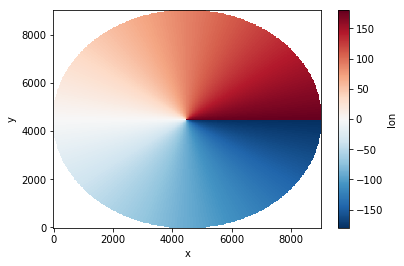

In [98]:
ds.lon.plot()
plt.savefig('lon.png')

In [92]:
data = xr.DataArray(ds.lwp[0], dims=('y','x'), coords={'lat': (('y', 'x'), ds.lat), 'lon': (('y', 'x'), ds.lon)})

#data = ds.lwp[0]
data

<xarray.DataArray 'lwp' (y: 361, x: 361)>
array([[ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       ..., 
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan]])
Coordinates:
    lat      (y, x) float32 nan nan nan nan nan nan nan nan nan nan nan nan ...
    lon      (y, x) float32 nan nan nan nan nan nan nan nan nan nan nan nan ...
Dimensions without coordinates: y, x
Attributes:
    long_name:      cloud liquid water path
    standard_name:  atmosphere_mass_content_of_cloud_liquid_water
    units:          kg/m2
    valid_min:      0
    valid_max:      10000

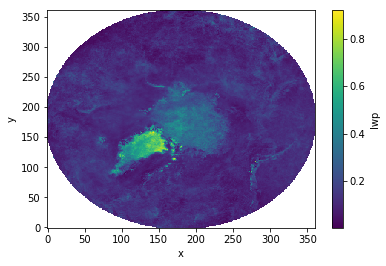

In [93]:
data.plot()

# Plot data with Cartopy georeferencing

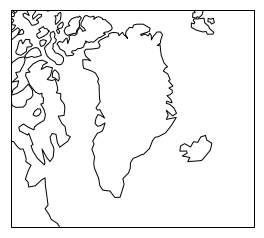

In [97]:
ax = plt.axes(projection=myproj3)
ax.set_extent([-70, -10, 55, 85], crs=ccrs.PlateCarree())
ax.coastlines()

#data.plot.contourf('lon','lat', transform=myproj, ax=ax) ## IllegalArgumentException: Points of LinearRing do not form a closed linestring
#data.plot.pcolormesh('lon','lat', transform=myproj, ax=ax) ## ValueError: x and y arguments to pcolormesh cannot have non-finite values or be of type numpy.ma.core.MaskedArray with masked values

# Again, but using filled coordinate arrays

In [76]:
# Pick latitude and longitude as coordinate arrays
lon = np.ma.masked_invalid( ds.lon.to_masked_array())
lat = np.ma.masked_invalid( ds.lat.to_masked_array())

# Fill up the missing values, for plotting only
# The exact fill values do not matter
# See also this discussion https://stackoverflow.com/questions/36228363/dealing-with-masked-coordinate-arrays-in-pcolormesh
lon[lon.mask] = 50
lat[lat.mask] = 0

data2 = xr.DataArray(ds.lwp[0], dims=('y','x'), coords={'lat': (('y', 'x'), lat), 'lon': (('y', 'x'), lon)})

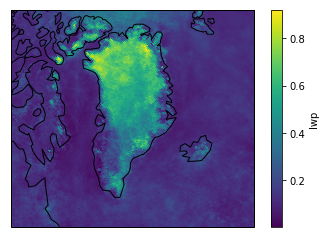

In [86]:
ax = plt.axes(projection=myproj3)
ax.set_extent([-70, -10, 55, 85], crs=ccrs.PlateCarree())
ax.coastlines()

#data2.plot.contourf('lon','lat', transform=myproj, ax=ax) ## TopologyException: side location conflict at 49.999999999999993 0
data2.plot.pcolormesh('lon','lat', transform=myproj, ax=ax)